# Configurations

In [24]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
import matplotlib as mpl

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None

rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.labelpad': 6,
      'xtick.major.pad': 10,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'lines.linewidth': 1,
      'font.size': 12,
      'axes.titlesize': 12,
      'axes.labelsize': 12,
      'xtick.labelsize': 12,
      'ytick.labelsize': 12,
      'legend.title_fontsize': 11,
      'legend.fontsize': 11,
      'figure.titlesize': 12,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
fig_dir=os.path.join(output_dir, 'figures', 'sfp_model', 'results_1D')
precision_dir='/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/precision'
stim_classes=['annulus', 'pinwheel', 'forward spiral', 'reverse spiral']
roi_list=['V1','V2','V3']
lr = 0.005
max_epoch = 8000

In [26]:
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
voxels='pRFcenter'

# eccentricity bin information
e1, e2=0.5, 4
enum=7
if enum is 7:
    enum_range=range(7)
elif enum is 'log3':
    enum_range=range(3)
bin_list, bin_labels = tuning.get_bin_labels(e1, e2, enum=enum)
broderick_bin_list, broderick_bin_labels = tuning.get_bin_labels(1, 12, enum=11)


a = [3,2,0]
roi_pal = [sns.color_palette('dark', 10)[:][k] for k in a]
roi_pal.insert(0, (0.5,0.5,0.5))


# Load the data and model parameters

## NSD data: data, fitting results, precision

In [27]:
# NSD data
f, m = [], []
for subj, roi in itertools.product(nsd_subj_list, roi_list):
    file_name = f'e1-{e1}_e2-{e2}_nbin-{enum}_sub-{subj}_roi-{roi}_vs-{voxels}.csv'
    f.append(os.path.join(output_dir, 'dataframes', 'nsdsyn', 'binned', file_name))
    #file_name = f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/dset-nsdsyn_sub-{subj}_roi-{roi}_vs-pRFcenter_tavg-True.csv'
    #f.append(file_name)
nsd_subj_df = utils.load_dataframes(f)
#nsd_subj_df_mean = nsd_subj_df.groupby(['voxel','freq_lvl','sub','vroinames']).mean().reset_index()
#nsd_subj_df['ecc_bin'] = tuning.bin_ecc(nsd_subj_df['eccentricity'], bin_list=bin_list, bin_labels=bin_labels)
nsd_subj_df = nsd_subj_df.groupby(['sub','ecc_bin','vroinames','freq_lvl']).mean().reset_index()


args = ['sub', 'class', 'lr', 'eph', 'roi', 'e1', 'e2', 'nbin', 'curbin']
# NSD fitting results
pt_file_list = []
for subj, roi, curbin, stim_class in itertools.product(nsd_subj_list, roi_list, range(enum), ['avg']):
    stim_class = stim_class.replace(' ', '-')
    file_name = f'model-params_class-{stim_class}_lr-{lr}_eph-{max_epoch}_e1-{e1}_e2-{e2}_nbin-{enum}_curbin-{curbin}_sub-{subj}_roi-{roi}_vs-{voxels}.pt'
    pt_file_list.append(os.path.join(output_dir, 'sfp_model', 'results_1D', 'nsdsyn',file_name))
nsd_tuning_df = tuning.load_all_models(pt_file_list, *args)


In [6]:
nsd_subj_df.query('ecc_bin == "0.5-1.0 deg" & vroinames == "V1" & freq_lvl == 0')

,sub,ecc_bin,vroinames,freq_lvl,betas,local_sf
0,subj01,0.5-1.0 deg,V1,0,2.261017,1.249905
126,subj02,0.5-1.0 deg,V1,0,2.253780,1.243962
252,subj03,0.5-1.0 deg,V1,0,2.010353,1.231486
378,subj04,0.5-1.0 deg,V1,0,1.543004,1.267778
504,subj05,0.5-1.0 deg,V1,0,2.988917,1.263925
630,subj06,0.5-1.0 deg,V1,0,1.871189,1.298769
756,subj07,0.5-1.0 deg,V1,0,1.574906,1.359080
882,subj08,0.5-1.0 deg,V1,0,1.874778,1.281493


In [9]:
nsd_tuning_df.query('ecc_bin == "0.5-1.0 deg" & vroinames == "V1"')

,slope,mode,sigma,sub,names,lr_rate,max_epoch,vroinames,e1,e2,nbin,curbin,ecc_bin
0,2.361267,2.729530,3.045381,subj01,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,3.463602,4.963478,2.176692,subj02,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,3.109646,7.327828,2.370810,subj03,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,2.006368,3.796832,2.183143,subj04,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,3.831731,4.803597,2.418049,subj05,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,2.093065,2.599225,2.031604,subj06,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,2.474303,6.083099,2.196207,subj07,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,1.979180,3.598121,3.620234,subj08,avg,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg


# Plot tuning curves for NSD V1, V2, V3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


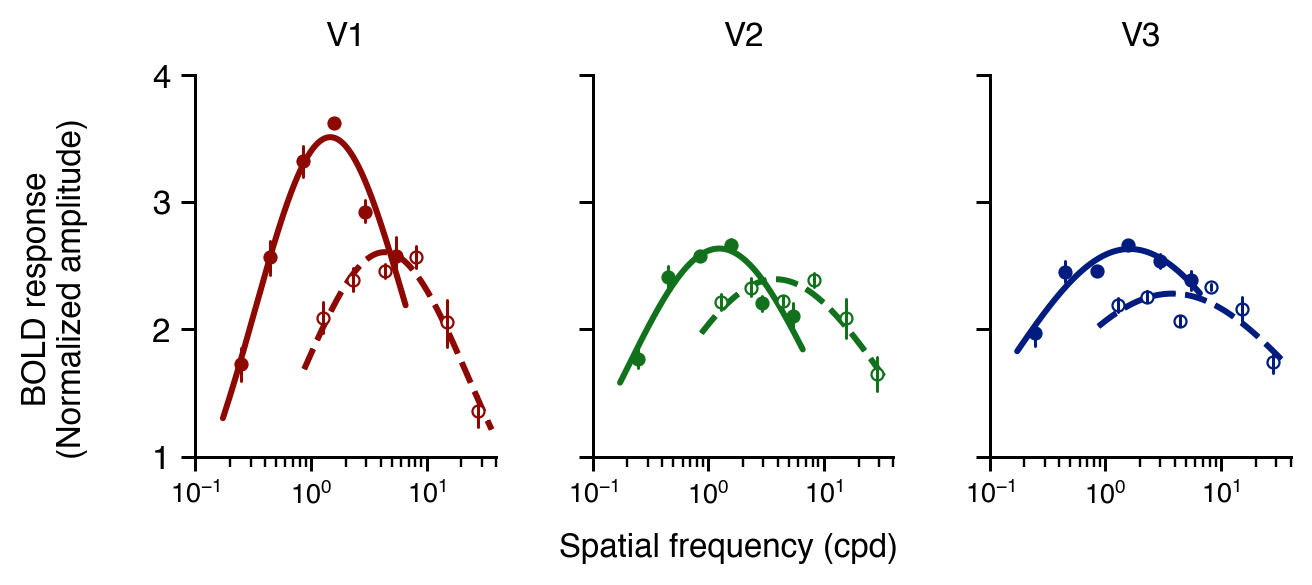

In [28]:
bins_to_plot = [bin_labels[k] for k in [0,6]]
fig, axes = vis1D.plot_average_tuning_curves_NSD_with_errorbar(nsd_subj_df, nsd_tuning_df, 
                                                                             y='betas', 
                                                                            bins_to_plot=bins_to_plot, 
                                                                            pal=roi_pal[1:],
                                                                            save_path=os.path.join(fig_dir, 'nsdsyn_subj-avg_tuning_curves_normalize-True.svg'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


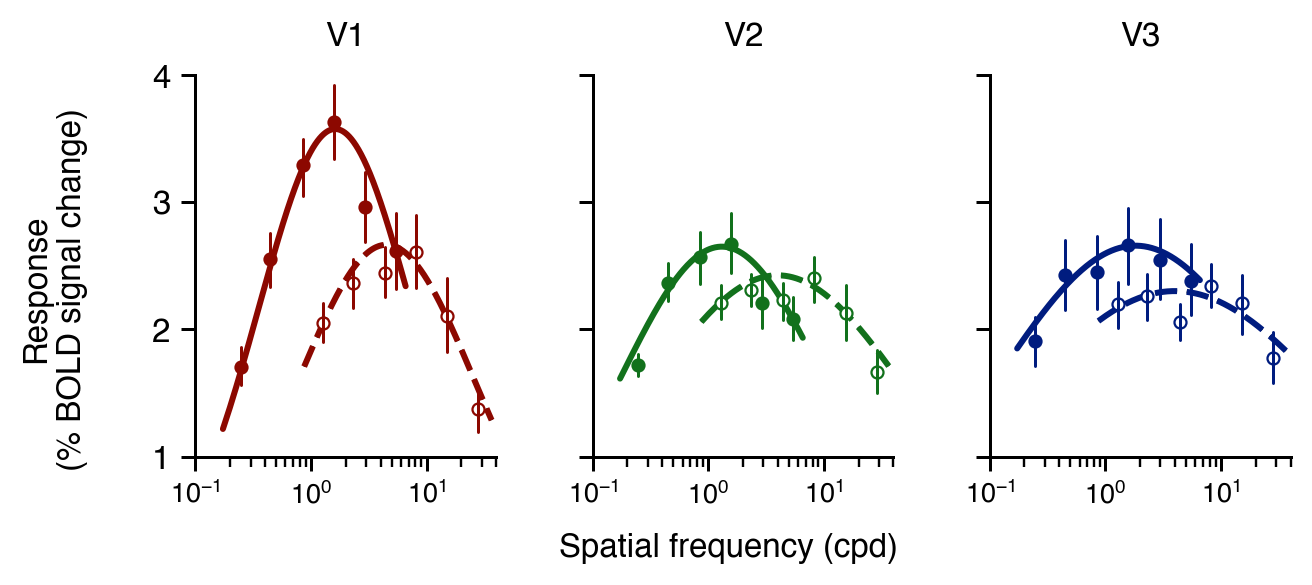

In [29]:
bins_to_plot = [bin_labels[k] for k in [0,6]]
fig, axes = vis1D.plot_average_tuning_curves_NSD_with_errorbar(nsd_subj_df, nsd_tuning_df, 
                                                                             y='betas', 
                                                                            bins_to_plot=bins_to_plot, 
                                                                            normalize=False,
                                                                            pal=roi_pal[1:],
                                                                            save_path=os.path.join(fig_dir, 'nsdsyn_subj-avg_tuning_curves_normalize-False.svg'))